# MultiEval Example

This notebook demonstrates a basic parameter sweep with LensKits `MultiEval` class.

## Setup

We first need to import our libraries.

In [1]:
from lenskit.batch import MultiEval
from lenskit.crossfold import partition_users, SampleN
from lenskit.algorithms import basic, als, item_knn
from lenskit.datasets import MovieLens
from lenskit import topn, util
import pandas as pd
import matplotlib.pyplot as plt

Progress bars are useful:

In [2]:
from tqdm.notebook import tqdm_notebook as tqdm
tqdm.pandas()

C:\Users\Jacob\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


It takes a little while to run things, and can get kinda quiet in here. Let's set up logging so we can see the logging output in the notebook's message stream:

In [3]:
util.log_to_notebook()

[   INFO] lenskit.util.log notebook logging configured


Then set up the data access.

In [4]:
mlsmall = MovieLens('../data/ml-latest-small')
#mlsmall = MovieLens('../data/ml-1m')
#mlsmall = MovieLens('../data/ml-20m')


## Experiment

We're going to run our evaluation and store its output in the `my-eval` directory, generating 20-item recommendation lists::

In [17]:
eval = MultiEval('my-eval', recommend=20)

We're going to use a 5-fold cross-validation setup.  We save the data into a list in memory so we have access to the test data later.  In a larger experiment, you might write the partitions to disk and pass the file names to `add_datasets`.

In [18]:
pairs = list(partition_users(mlsmall.ratings, 5, SampleN(5)))
eval.add_datasets(pairs, name='ML-Small')

[   INFO] lenskit.crossfold partitioning 100004 rows for 671 users into 5 partitions
[   INFO] lenskit.crossfold fold 0: selecting test ratings
[   INFO] lenskit.crossfold fold 0: partitioning training data
[   INFO] lenskit.crossfold fold 1: selecting test ratings
[   INFO] lenskit.crossfold fold 1: partitioning training data
[   INFO] lenskit.crossfold fold 2: selecting test ratings
[   INFO] lenskit.crossfold fold 2: partitioning training data
[   INFO] lenskit.crossfold fold 3: selecting test ratings
[   INFO] lenskit.crossfold fold 3: partitioning training data
[   INFO] lenskit.crossfold fold 4: selecting test ratings
[   INFO] lenskit.crossfold fold 4: partitioning training data


We're going to test explicit MF with several neighborhood sizes:

In [19]:
eval.add_algorithms([als.BiasedMF(f) for f in [20, 30, 40, 50]], attrs=['features'], name='BiasedMF')

And implicit MF:

In [20]:
eval.add_algorithms([als.ImplicitMF(f) for f in [20, 30, 40, 50]], attrs=['features'], name='ImplicitMF')

And add a popular baseline for comparison:

In [21]:
eval.add_algorithms(basic.Popular(), name='Pop')

And finally, we will run the experiment!

In [22]:
eval.run(progress=tqdm)

[   INFO] lenskit.batch._multi starting run 1: als.BiasedMF(features=20, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi adapting als.BiasedMF(features=20, regularization=0.1) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.BiasedMF(features=20, regularization=0.1) on 99329 ratings
[   INFO] lenskit.algorithms.als [ 1ms] fitting bias model
[   INFO] lenskit.algorithms.bias building bias model for 99329 ratings
[   INFO] lenskit.algorithms.bias global mean: 3.542
[   INFO] lenskit.algorithms.bias computed means for 9055 items
[   INFO] lenskit.algorithms.bias computed means for 671 users
[   INFO] lenskit.algorithms.als [ 233ms] normalizing 671x9055 matrix (99329 nnz)
[   INFO] lenskit.algorithms.als [ 250ms] training biased MF model with ALS for 20 features
[   INFO] lenskit.algorithms.als [ 303ms] finished epoch 0 (|ΔP|=33.950, |ΔQ|=137.931)
[   INFO] lenskit.algorithms.als [ 349ms] finished epoch 1 (|ΔP|=16.564, |ΔQ|=70.313)
[   INFO] lenskit

[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.BiasedMF(features=30, regularization=0.1) for 135 users (n_jobs=None)
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] lenskit.batch._recommend recommended for 135 users in 5.86s
[   INFO] lenskit.batch._multi generated recommendations in 6.28s
[   INFO] lenskit.batch._multi run 2: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 2: als.BiasedMF(features=30, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 3: als.BiasedMF(features=40, regularization=0.1) on ML-Small:1
[   INFO] lenskit.batch._multi adapting als.BiasedMF(features=40, regularization=0.1) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.BiasedMF(features=40, regularization=0.1) on 99329 ratings
[   INFO] lenskit.alg

[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup took  11ms)
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] lenskit.batch._predict generated 675 predictions for 135 users in 5.19s
[   INFO] lenskit.batch._multi generated predictions in 5.63s
[   INFO] lenskit.batch._multi run 4: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/als.BiasedMF(features=50, regularization=0.1)
[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=50, regularization=0.1) to 1836 pickle bytes with 14 buffers of 4679444 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.BiasedMF(features=50, regularization=0.1) for 135 users (n_jobs=None)
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils Nu

[   INFO] lenskit.batch._predict generated 675 predictions for 135 users in 5.06s
[   INFO] lenskit.batch._multi generated predictions in 5.54s
[   INFO] lenskit.batch._multi run 6: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/als.ImplicitMF(features=30, reg=0.1, w=40)
[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=30, reg=0.1, w=40) to 1240 pickle bytes with 9 buffers of 2897060 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.ImplicitMF(features=30, reg=0.1, w=40) for 135 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 135 users in 5.43s
[   INFO] lenskit.batch._multi generated recommendations in 5.91s
[   INFO] lenskit.batch._multi run 6: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 6: als.ImplicitMF(features=30, 

[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=50, reg=0.1, w=40) to 1240 pickle bytes with 9 buffers of 4466020 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.ImplicitMF(features=50, reg=0.1, w=40) for 135 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 135 users in 5.64s
[   INFO] lenskit.batch._multi generated recommendations in 6.08s
[   INFO] lenskit.batch._multi run 8: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 8: als.ImplicitMF(features=50, reg=0.1, w=40) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 9: Popular on ML-Small:1
[   INFO] lenskit.batch._multi training algorithm Popular on 99329 ratings
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99329 ratings
[   INFO] lenskit.batch._multi trained algorithm Popular in  45ms
[   INFO] lenskit.batch._m

[   INFO] lenskit.algorithms.als [1.22s] finished epoch 16 (|ΔP|=0.806, |ΔQ|=2.309)
[   INFO] lenskit.algorithms.als [1.28s] finished epoch 17 (|ΔP|=0.740, |ΔQ|=2.117)
[   INFO] lenskit.algorithms.als [1.34s] finished epoch 18 (|ΔP|=0.684, |ΔQ|=1.951)
[   INFO] lenskit.algorithms.als [1.40s] finished epoch 19 (|ΔP|=0.635, |ΔQ|=1.805)
[   INFO] lenskit.algorithms.als trained model in 1.40s (|P|=34.219767, |Q|=101.639730)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.BiasedMF(features=30, regularization=0.1) in 1.42s
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.BiasedMF(features=30, regularization=0.1)
[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=30, regularization=0.1) to 1835 pickle bytes with 14 buffers of 3123304 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._predict generating 670 p

[   INFO] lenskit.algorithms.als [ 951ms] finished epoch 7 (|ΔP|=2.124, |ΔQ|=7.395)
[   INFO] lenskit.algorithms.als [1.06s] finished epoch 8 (|ΔP|=1.774, |ΔQ|=6.180)
[   INFO] lenskit.algorithms.als [1.15s] finished epoch 9 (|ΔP|=1.504, |ΔQ|=5.277)
[   INFO] lenskit.algorithms.als [1.27s] finished epoch 10 (|ΔP|=1.291, |ΔQ|=4.566)
[   INFO] lenskit.algorithms.als [1.36s] finished epoch 11 (|ΔP|=1.118, |ΔQ|=3.985)
[   INFO] lenskit.algorithms.als [1.46s] finished epoch 12 (|ΔP|=0.978, |ΔQ|=3.504)
[   INFO] lenskit.algorithms.als [1.56s] finished epoch 13 (|ΔP|=0.864, |ΔQ|=3.097)
[   INFO] lenskit.algorithms.als [1.65s] finished epoch 14 (|ΔP|=0.770, |ΔQ|=2.754)
[   INFO] lenskit.algorithms.als [1.73s] finished epoch 15 (|ΔP|=0.692, |ΔQ|=2.465)
[   INFO] lenskit.algorithms.als [1.81s] finished epoch 16 (|ΔP|=0.627, |ΔQ|=2.223)
[   INFO] lenskit.algorithms.als [1.90s] finished epoch 17 (|ΔP|=0.572, |ΔQ|=2.015)
[   INFO] lenskit.algorithms.als [1.98s] finished epoch 18 (|ΔP|=0.524, |ΔQ|=1

[   INFO] lenskit.algorithms.als [1.94s] finished epoch 8 (|ΔP|=83.525, |ΔQ|=0.721)
[   INFO] lenskit.algorithms.als [2.15s] finished epoch 9 (|ΔP|=80.208, |ΔQ|=0.653)
[   INFO] lenskit.algorithms.als [2.35s] finished epoch 10 (|ΔP|=76.428, |ΔQ|=0.597)
[   INFO] lenskit.algorithms.als [2.57s] finished epoch 11 (|ΔP|=78.246, |ΔQ|=0.556)
[   INFO] lenskit.algorithms.als [2.81s] finished epoch 12 (|ΔP|=72.421, |ΔQ|=0.516)
[   INFO] lenskit.algorithms.als [3.03s] finished epoch 13 (|ΔP|=73.956, |ΔQ|=0.490)
[   INFO] lenskit.algorithms.als [3.24s] finished epoch 14 (|ΔP|=77.663, |ΔQ|=0.473)
[   INFO] lenskit.algorithms.als [3.46s] finished epoch 15 (|ΔP|=72.790, |ΔQ|=0.445)
[   INFO] lenskit.algorithms.als [3.68s] finished epoch 16 (|ΔP|=68.750, |ΔQ|=0.434)
[   INFO] lenskit.algorithms.als [3.90s] finished epoch 17 (|ΔP|=74.072, |ΔQ|=0.406)
[   INFO] lenskit.algorithms.als [4.11s] finished epoch 18 (|ΔP|=66.348, |ΔQ|=0.395)
[   INFO] lenskit.algorithms.als [4.32s] finished epoch 19 (|ΔP|=90

[   INFO] lenskit.algorithms.als [3.04s] finished epoch 12 (|ΔP|=122.048, |ΔQ|=0.448)
[   INFO] lenskit.algorithms.als [3.27s] finished epoch 13 (|ΔP|=99.202, |ΔQ|=0.400)
[   INFO] lenskit.algorithms.als [3.49s] finished epoch 14 (|ΔP|=124.711, |ΔQ|=0.421)
[   INFO] lenskit.algorithms.als [3.71s] finished epoch 15 (|ΔP|=86.050, |ΔQ|=0.358)
[   INFO] lenskit.algorithms.als [3.92s] finished epoch 16 (|ΔP|=112.263, |ΔQ|=0.380)
[   INFO] lenskit.algorithms.als [4.15s] finished epoch 17 (|ΔP|=76.247, |ΔQ|=0.326)
[   INFO] lenskit.algorithms.als [4.39s] finished epoch 18 (|ΔP|=115.847, |ΔQ|=0.363)
[   INFO] lenskit.algorithms.als [4.63s] finished epoch 19 (|ΔP|=70.068, |ΔQ|=0.299)
[   INFO] lenskit.algorithms.als [4.64s] finished training model with 50 features (|P|=2489.376271, |Q|=8.299102)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.ImplicitMF(features=50, reg=0.1, w=40) in 4.67s
[   INFO] len

[   INFO] lenskit.algorithms.als [ 0ms] fitting bias model
[   INFO] lenskit.algorithms.bias building bias model for 99334 ratings
[   INFO] lenskit.algorithms.bias global mean: 3.543
[   INFO] lenskit.algorithms.bias computed means for 9056 items
[   INFO] lenskit.algorithms.bias computed means for 671 users
[   INFO] lenskit.algorithms.als [ 232ms] normalizing 671x9056 matrix (99334 nnz)
[   INFO] lenskit.algorithms.als [ 251ms] training biased MF model with ALS for 30 features
[   INFO] lenskit.algorithms.als [ 308ms] finished epoch 0 (|ΔP|=35.211, |ΔQ|=140.946)
[   INFO] lenskit.algorithms.als [ 368ms] finished epoch 1 (|ΔP|=17.055, |ΔQ|=71.591)
[   INFO] lenskit.algorithms.als [ 427ms] finished epoch 2 (|ΔP|=10.449, |ΔQ|=32.382)
[   INFO] lenskit.algorithms.als [ 483ms] finished epoch 3 (|ΔP|=6.666, |ΔQ|=19.216)
[   INFO] lenskit.algorithms.als [ 539ms] finished epoch 4 (|ΔP|=4.706, |ΔQ|=13.909)
[   INFO] lenskit.algorithms.als [ 599ms] finished epoch 5 (|ΔP|=3.566, |ΔQ|=10.769)
[

[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] lenskit.batch._recommend recommended for 134 users in 6.01s
[   INFO] lenskit.batch._multi generated recommendations in 6.44s
[   INFO] lenskit.batch._multi run 21: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 21: als.BiasedMF(features=40, regularization=0.1) on ML-Small:3
[   INFO] lenskit.batch._multi starting run 22: als.BiasedMF(features=50, regularization=0.1) on ML-Small:3
[   INFO] lenskit.batch._multi adapting als.BiasedMF(features=50, regularization=0.1) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.BiasedMF(features=50, regularization=0.1) on 99334 ratings
[   INFO] lenskit.algorithms.als [ 0ms] fitting bias model
[   INFO] lenskit.algorithms.bias building bias model for 99334 ratings
[   INFO] lenskit.algorithms.bias global mean: 3.543
[   INFO] lenskit.algorithms.bias computed means for 9056 items
[   INFO] lenskit.algorithms.bias c

[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.ImplicitMF(features=20, reg=0.1, w=40) for 134 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 134 users in 5.48s
[   INFO] lenskit.batch._multi generated recommendations in 5.93s
[   INFO] lenskit.batch._multi run 23: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 23: als.ImplicitMF(features=20, reg=0.1, w=40) on ML-Small:3
[   INFO] lenskit.batch._multi starting run 24: als.ImplicitMF(features=30, reg=0.1, w=40) on ML-Small:3
[   INFO] lenskit.batch._multi adapting als.ImplicitMF(features=30, reg=0.1, w=40) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.ImplicitMF(features=30, reg=0.1, w=40) on 99334 ratings
[   INFO] lenskit.algorithms.als [ 42ms] training implicit MF model with ALS for 30 features
[   INFO] lenskit.algorithms.als have 99334 observatio

[   INFO] lenskit.batch._multi run 25: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 25: als.ImplicitMF(features=40, reg=0.1, w=40) on ML-Small:3
[   INFO] lenskit.batch._multi starting run 26: als.ImplicitMF(features=50, reg=0.1, w=40) on ML-Small:3
[   INFO] lenskit.batch._multi adapting als.ImplicitMF(features=50, reg=0.1, w=40) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.ImplicitMF(features=50, reg=0.1, w=40) on 99334 ratings
[   INFO] lenskit.algorithms.als [ 46ms] training implicit MF model with ALS for 50 features
[   INFO] lenskit.algorithms.als have 99334 observations for 671 users and 9056 items
[   INFO] lenskit.algorithms.als [ 266ms] finished epoch 0 (|ΔP|=4302.111, |ΔQ|=7.511)
[   INFO] lenskit.algorithms.als [ 484ms] finished epoch 1 (|ΔP|=236.835, |ΔQ|=2.874)
[   INFO] lenskit.algorithms.als [ 710ms] finished epoch 2 (|ΔP|=202.331, |ΔQ|=1.833)
[   INFO] lenskit.algorithms.als [ 948ms] finished

[   INFO] lenskit.batch._predict generating 670 predictions for 134 users (setup took  10ms)
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] lenskit.batch._predict generated 670 predictions for 134 users in 5.11s
[   INFO] lenskit.batch._multi generated predictions in 5.53s
[   INFO] lenskit.batch._multi run 28: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 134 users for TopN/als.BiasedMF(features=20, regularization=0.1)
[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=20, regularization=0.1) to 1835 pickle bytes with 14 buffers of 2346424 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/als.BiasedMF(features=20, regularization=0.1) for 134 users (n_jobs=None)
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils N

[   INFO] lenskit.algorithms.als [1.78s] finished epoch 19 (|ΔP|=0.591, |ΔQ|=1.778)
[   INFO] lenskit.algorithms.als trained model in 1.78s (|P|=34.672363, |Q|=101.710552)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.BiasedMF(features=40, regularization=0.1) in 1.81s
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.BiasedMF(features=40, regularization=0.1)
[   INFO] lenskit.sharing.shm serialized TopN/als.BiasedMF(features=40, regularization=0.1) to 1835 pickle bytes with 14 buffers of 3903544 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._predict generating 670 predictions for 134 users (setup took  15ms)
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] numexpr.utils NumExpr defaulting to 4 threads.
[   INFO] lenskit.batch._predict generated 670 predictions for 134 users in 5.12s
[   INFO] le

[   INFO] lenskit.algorithms.als [3.00s] finished epoch 14 (|ΔP|=61.131, |ΔQ|=0.522)
[   INFO] lenskit.algorithms.als [3.19s] finished epoch 15 (|ΔP|=63.272, |ΔQ|=0.513)
[   INFO] lenskit.algorithms.als [3.39s] finished epoch 16 (|ΔP|=51.187, |ΔQ|=0.460)
[   INFO] lenskit.algorithms.als [3.60s] finished epoch 17 (|ΔP|=56.003, |ΔQ|=0.460)
[   INFO] lenskit.algorithms.als [3.78s] finished epoch 18 (|ΔP|=44.952, |ΔQ|=0.408)
[   INFO] lenskit.algorithms.als [3.99s] finished epoch 19 (|ΔP|=60.726, |ΔQ|=0.444)
[   INFO] lenskit.algorithms.als [3.99s] finished training model with 20 features (|P|=2602.883853, |Q|=9.643341)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.ImplicitMF(features=20, reg=0.1, w=40) in 4.02s
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.ImplicitMF(features=20, reg=0.1, w=40)
[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=20, reg

[   INFO] lenskit.algorithms.als [4.12s] finished epoch 18 (|ΔP|=109.678, |ΔQ|=0.376)
[   INFO] lenskit.algorithms.als [4.34s] finished epoch 19 (|ΔP|=70.771, |ΔQ|=0.320)
[   INFO] lenskit.algorithms.als [4.34s] finished training model with 40 features (|P|=2636.116599, |Q|=8.595775)
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99334 ratings
[   INFO] lenskit.batch._multi trained algorithm als.ImplicitMF(features=40, reg=0.1, w=40) in 4.37s
[   INFO] lenskit.batch._multi generating 670 predictions for TopN/als.ImplicitMF(features=40, reg=0.1, w=40)
[   INFO] lenskit.sharing.shm serialized TopN/als.ImplicitMF(features=40, reg=0.1, w=40) to 1242 pickle bytes with 9 buffers of 3682776 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._predict generating 670 predictions for 134 users (setup took  14ms)
[   INFO] lenskit.batch._predict generated 670 predictions for 134 users in 4.96s
[   INFO] lenskit.batch

[   INFO] lenskit.algorithms.als [ 563ms] finished epoch 7 (|ΔP|=2.301, |ΔQ|=6.892)
[   INFO] lenskit.algorithms.als [ 621ms] finished epoch 8 (|ΔP|=1.954, |ΔQ|=5.846)
[   INFO] lenskit.algorithms.als [ 665ms] finished epoch 9 (|ΔP|=1.694, |ΔQ|=5.056)
[   INFO] lenskit.algorithms.als [ 706ms] finished epoch 10 (|ΔP|=1.493, |ΔQ|=4.437)
[   INFO] lenskit.algorithms.als [ 746ms] finished epoch 11 (|ΔP|=1.333, |ΔQ|=3.943)
[   INFO] lenskit.algorithms.als [ 789ms] finished epoch 12 (|ΔP|=1.204, |ΔQ|=3.544)
[   INFO] lenskit.algorithms.als [ 831ms] finished epoch 13 (|ΔP|=1.096, |ΔQ|=3.218)
[   INFO] lenskit.algorithms.als [ 873ms] finished epoch 14 (|ΔP|=1.006, |ΔQ|=2.948)
[   INFO] lenskit.algorithms.als [ 923ms] finished epoch 15 (|ΔP|=0.928, |ΔQ|=2.721)
[   INFO] lenskit.algorithms.als [ 976ms] finished epoch 16 (|ΔP|=0.861, |ΔQ|=2.526)
[   INFO] lenskit.algorithms.als [1.03s] finished epoch 17 (|ΔP|=0.802, |ΔQ|=2.356)
[   INFO] lenskit.algorithms.als [1.08s] finished epoch 18 (|ΔP|=0.75

[   INFO] lenskit.algorithms.als [ 194ms] normalizing 671x9054 matrix (99334 nnz)
[   INFO] lenskit.algorithms.als [ 223ms] training biased MF model with ALS for 40 features
[   INFO] lenskit.algorithms.als [ 293ms] finished epoch 0 (|ΔP|=35.922, |ΔQ|=141.936)
[   INFO] lenskit.algorithms.als [ 358ms] finished epoch 1 (|ΔP|=17.330, |ΔQ|=72.646)
[   INFO] lenskit.algorithms.als [ 429ms] finished epoch 2 (|ΔP|=10.553, |ΔQ|=32.784)
[   INFO] lenskit.algorithms.als [ 499ms] finished epoch 3 (|ΔP|=6.522, |ΔQ|=20.022)
[   INFO] lenskit.algorithms.als [ 574ms] finished epoch 4 (|ΔP|=4.518, |ΔQ|=14.346)
[   INFO] lenskit.algorithms.als [ 643ms] finished epoch 5 (|ΔP|=3.364, |ΔQ|=10.869)
[   INFO] lenskit.algorithms.als [ 713ms] finished epoch 6 (|ΔP|=2.644, |ΔQ|=8.664)
[   INFO] lenskit.algorithms.als [ 784ms] finished epoch 7 (|ΔP|=2.163, |ΔQ|=7.149)
[   INFO] lenskit.algorithms.als [ 853ms] finished epoch 8 (|ΔP|=1.821, |ΔQ|=6.047)
[   INFO] lenskit.algorithms.als [ 931ms] finished epoch 9 (

[   INFO] lenskit.batch._multi finished run 40: als.BiasedMF(features=50, regularization=0.1) on ML-Small:5
[   INFO] lenskit.batch._multi starting run 41: als.ImplicitMF(features=20, reg=0.1, w=40) on ML-Small:5
[   INFO] lenskit.batch._multi adapting als.ImplicitMF(features=20, reg=0.1, w=40) into a recommender
[   INFO] lenskit.batch._multi training algorithm als.ImplicitMF(features=20, reg=0.1, w=40) on 99334 ratings
[   INFO] lenskit.algorithms.als [ 38ms] training implicit MF model with ALS for 20 features
[   INFO] lenskit.algorithms.als have 99334 observations for 671 users and 9054 items
[   INFO] lenskit.algorithms.als [ 254ms] finished epoch 0 (|ΔP|=3396.103, |ΔQ|=8.010)
[   INFO] lenskit.algorithms.als [ 456ms] finished epoch 1 (|ΔP|=196.857, |ΔQ|=3.255)
[   INFO] lenskit.algorithms.als [ 669ms] finished epoch 2 (|ΔP|=88.738, |ΔQ|=2.218)
[   INFO] lenskit.algorithms.als [ 873ms] finished epoch 3 (|ΔP|=89.738, |ΔQ|=1.754)
[   INFO] lenskit.algorithms.als [1.07s] finished epo

[   INFO] lenskit.batch._multi training algorithm als.ImplicitMF(features=40, reg=0.1, w=40) on 99334 ratings
[   INFO] lenskit.algorithms.als [ 37ms] training implicit MF model with ALS for 40 features
[   INFO] lenskit.algorithms.als have 99334 observations for 671 users and 9054 items
[   INFO] lenskit.algorithms.als [ 272ms] finished epoch 0 (|ΔP|=4100.398, |ΔQ|=8.239)
[   INFO] lenskit.algorithms.als [ 482ms] finished epoch 1 (|ΔP|=207.214, |ΔQ|=3.238)
[   INFO] lenskit.algorithms.als [ 695ms] finished epoch 2 (|ΔP|=139.939, |ΔQ|=2.075)
[   INFO] lenskit.algorithms.als [ 905ms] finished epoch 3 (|ΔP|=155.837, |ΔQ|=1.576)
[   INFO] lenskit.algorithms.als [1.11s] finished epoch 4 (|ΔP|=160.773, |ΔQ|=1.217)
[   INFO] lenskit.algorithms.als [1.33s] finished epoch 5 (|ΔP|=133.291, |ΔQ|=0.968)
[   INFO] lenskit.algorithms.als [1.54s] finished epoch 6 (|ΔP|=119.804, |ΔQ|=0.815)
[   INFO] lenskit.algorithms.als [1.76s] finished epoch 7 (|ΔP|=106.300, |ΔQ|=0.700)
[   INFO] lenskit.algorith

[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with Popular for 134 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 134 users in 4.81s
[   INFO] lenskit.batch._multi generated recommendations in 5.09s
[   INFO] lenskit.batch._multi run 45: writing results to my-eval\recommendations.parquet
[   INFO] lenskit.batch._multi finished run 45: Popular on ML-Small:5



## Analysis

Now that the experiment is run, we can read its outputs.

First the run metadata:

In [23]:
runs = pd.read_csv('my-eval/runs.csv')
runs.set_index('RunId', inplace=True)
runs.head()

,DataSet,Partition,AlgoClass,AlgoStr,name,features,TrainTime,PredTime,RecTime
RunId,,,,,,,,,
1,ML-Small,1,BiasedMF,"als.BiasedMF(features=20, regularization=0.1)",BiasedMF,20.0,1.435636,5.789356,6.480090
2,ML-Small,1,BiasedMF,"als.BiasedMF(features=30, regularization=0.1)",BiasedMF,30.0,1.472057,5.745330,6.277449
3,ML-Small,1,BiasedMF,"als.BiasedMF(features=40, regularization=0.1)",BiasedMF,40.0,1.604960,5.560122,6.442606
4,ML-Small,1,BiasedMF,"als.BiasedMF(features=50, regularization=0.1)",BiasedMF,50.0,2.097863,5.633083,6.564924
5,ML-Small,1,ImplicitMF,"als.ImplicitMF(features=20, reg=0.1, w=40)",ImplicitMF,20.0,12.260741,5.552670,5.887903


This describes each run - a data set, partition, and algorithm combination.  To evaluate, we need to get the actual recommendations, and combine them with this:

In [24]:
recs = pd.read_parquet('my-eval/recommendations.parquet')
recs.head()

,item,score,user,rank,RunId
0,190,5.421891,17,1,1
1,581,5.223849,17,2,1
2,28,5.034180,17,3,1
3,994,4.970911,17,4,1
4,3153,4.942199,17,5,1


We're going to compute per-(run,user) evaluations of the recommendations *before* combining with metadata. 

In order to evaluate the recommendation list, we need to build a combined set of truth data. Since this is a disjoint partition of users over a single data set, we can just concatenate the individual test frames:

In [25]:
truth = pd.concat((p.test for p in pairs), ignore_index=True)

Now we can set up an analysis and compute the results.

In [26]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg) # precision, recall, recip_rank, dcg, ndcg
raw_ndcg = rla.compute(recs, truth) 
raw_ndcg.head()

[   INFO] lenskit.topn analyzing 415580 recommendations (3355 truth rows)
[   INFO] lenskit.topn using rec key columns ['RunId', 'user']
[   INFO] lenskit.topn using truth key columns ['user']
[   INFO] lenskit.topn collecting truth data
[   INFO] lenskit.topn collecting metric results
[   INFO] lenskit.sharing.shm serialized <lenskit.topn._RLAJob object at 0x000001B8F617B640> to 230486 pickle bytes with 2016 buffers of 13365660 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.topn measured 20779 lists in 28.58s


nrecs      ndcg
RunId user                 
1     17     20.0  0.000000
      19     20.0  0.000000
      20     20.0  0.000000
      24     20.0  0.296532
      31     20.0  0.082087

Next, we need to combine this with our run data, so that we know what algorithms and configurations we are evaluating:

In [27]:
### FOR MATRIX FACTORIZATION METHODS ONLY ###
ndcg = raw_ndcg.join(runs[['AlgoClass', 'features']], on='RunId')
ndcg.head()

nrecs      ndcg AlgoClass  features
RunId user                                     
1     17     20.0  0.000000  BiasedMF      20.0
      19     20.0  0.000000  BiasedMF      20.0
      20     20.0  0.000000  BiasedMF      20.0
      24     20.0  0.296532  BiasedMF      20.0
      31     20.0  0.082087  BiasedMF      20.0

We can compute the overall average performance for each algorithm configuration - fillna makes the group-by happy with Popular's lack of a feature count:

In [28]:
### FOR MATRIX FACTORIZATION METHODS ONLY ###
ndcg.fillna(0).groupby(['AlgoClass', 'features'])['ndcg'].mean()

AlgoClass   features
0           0.0         0.005197
BiasedMF    20.0        0.017703
            30.0        0.021462
            40.0        0.023464
            50.0        0.025703
ImplicitMF  20.0        0.085554
            30.0        0.098807
            40.0        0.106100
            50.0        0.112921
Popular     0.0         0.086709
Name: ndcg, dtype: float64

Now, we can plot this:

Text(0, 0.5, 'nDCG')

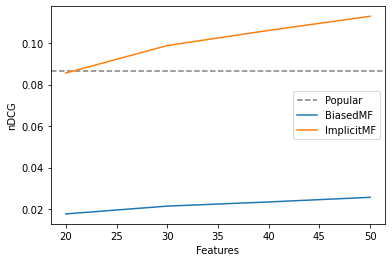

In [29]:
### FOR MATRIX FACTORIZATION METHODS ONLY ###
mf_scores = ndcg.groupby(['AlgoClass', 'features'])['ndcg'].mean().reset_index()
pop_score = ndcg[ndcg['AlgoClass'] == 'Popular']['ndcg'].mean()
plt.axhline(pop_score, color='grey', linestyle='--', label='Popular')
for algo, data in mf_scores.groupby('AlgoClass'):
    plt.plot(data['features'], data['ndcg'], label=algo)
plt.legend()
plt.xlabel('Features')
plt.ylabel('nDCG')